<a href="https://colab.research.google.com/github/wojferda/ai-flower-recognition/blob/main/projekt_kwiatyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importy:

In [ ]:
import os
import cv2
import numpy as np


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

folder_dir = '/content/drive/MyDrive/kwiaty/flowers'


Mounted at /content/drive/


Skrypt sprawdza w katalogu z kwiatami, ile jest zdjęć .jpg dla każdego gatunku. Dodatkowo wykrywa pliki, które nie są w formacie .jpg, i je wypisuje. Na końcu wyświetla podsumowanie: liczbę zdjęć .jpg oraz ewentualne pliki o innych rozszerzeniach.


In [ ]:
import os

base_path = "/content/drive/MyDrive/kwiaty/flowers"

species_counts = {}
non_jpg_files = {}

for species in os.listdir(base_path):
    species_path = os.path.join(base_path, species)

    if os.path.isdir(species_path):
        images = os.listdir(species_path)
        jpg_images = [img for img in images if img.lower().endswith('.jpg')]
        non_jpg = [img for img in images if not img.lower().endswith('.jpg')]

        species_counts[species] = len(jpg_images)

        if non_jpg:
            non_jpg_files[species] = non_jpg

print("Liczba zdjęć .jpg dla każdego gatunku:")
for species, count in species_counts.items():
    print(f"{species}: {count} zdjęć")

if non_jpg_files:
    print("\n Nie-jpg pliki znalezione:")
    for species, files in non_jpg_files.items():
        print(f"{species}: {files}")
else:
    print("\n Wszystkie pliki to .jpg!")


Liczba zdjęć .jpg dla każdego gatunku:
dandelion: 1052 zdjęć
daisy: 764 zdjęć
tulip: 984 zdjęć
sunflower: 733 zdjęć
rose: 784 zdjęć

 Wszystkie pliki to .jpg!


Skrypt zlicza liczbę zdjęć .jpg dla każdego gatunku kwiatów w podanym folderze, a następnie tworzy histogram przedstawiający te liczby na wykresie słupkowym.

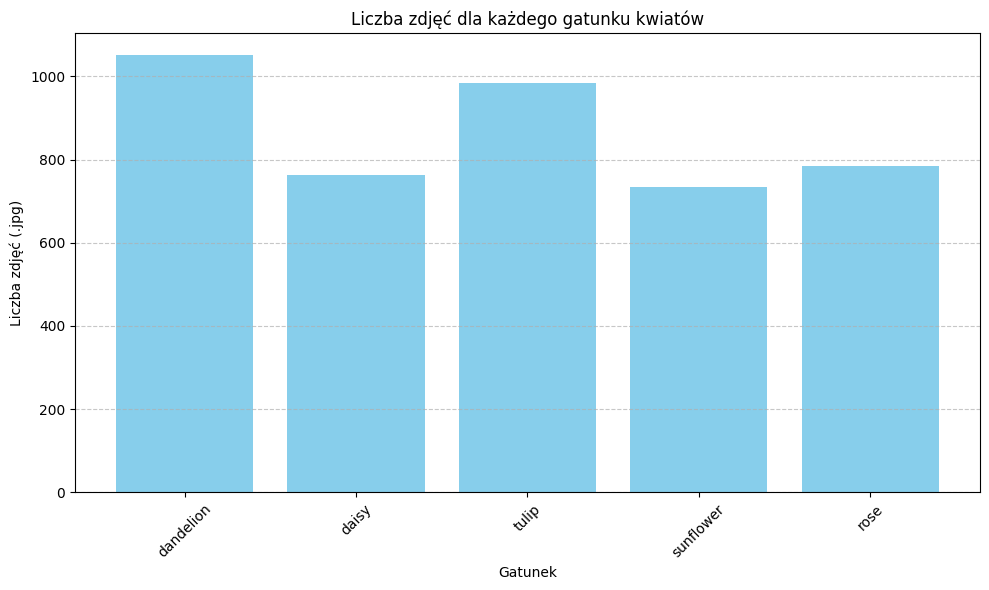

In [ ]:
import os
import matplotlib.pyplot as plt


base_path = "/content/drive/MyDrive/kwiaty/flowers"

species_counts = {}


for species in os.listdir(base_path):
    species_path = os.path.join(base_path, species)
    if os.path.isdir(species_path):
        images = os.listdir(species_path)
        jpg_images = [img for img in images if img.lower().endswith('.jpg')]
        species_counts[species] = len(jpg_images)


plt.figure(figsize=(10, 6))
plt.bar(species_counts.keys(), species_counts.values(), color='skyblue')
plt.title("Liczba zdjęć dla każdego gatunku kwiatów")
plt.xlabel("Gatunek")
plt.ylabel("Liczba zdjęć (.jpg)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Kod wczytuje wszystkie obrazy .jpg z podfolderów, przetwarza je (konwersja kolorów + zmiana rozmiaru) i zapisuje do listy data, a odpowiadające etykiety (gatunki) zapisuje w label.

In [ ]:
data = []
label = []

SIZE = 128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Kod przekształca dane wejściowe i etykiety w tablice NumPy, koduje etykiety gatunków do postaci numerycznej za pomocą LabelEncoder, następnie zamienia je na wektory one-hot przy użyciu to_categorical. Obrazy są normalizowane (dzielone przez 255), aby wartości pikseli mieściły się w przedziale [0, 1]. Na końcu dane są dzielone na zbiory treningowy i testowy w proporcji 80/20, z zachowaniem ustalonej losowości (random_state=10).


In [ ]:
data_arr = np.array(data)
label_arr = np.array(label)

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

W projekcie planujemy zastosowac konwolucyjną sieć neuronową (CNN) jako algorytm sztucznej inteligencji (AI) do klasyfikacji obrazów kwiatów. Wybór CNN był podyktowany jej skutecznością w analizie danych obrazowych, gdzie lokalne wzorce i struktury są istotne dla rozpoznania obiektów.

Przed przystąpieniem do trenowania modelu:

Obrazy zostały przeskalowane do rozmiaru 128×128 pikseli oraz znormalizowane (podzielone przez 255).

Etykiety gatunków kwiatów zostały zakodowane za pomocą LabelEncoder, a następnie zamienione na reprezentację one-hot.

Dane zostały podzielone na zbiór treningowy (80%) i testowy (20%).

Zastosowano także technikę augmentacji danych (ImageDataGenerator), która dynamicznie tworzy nowe próbki treningowe poprzez losowe transformacje (obrót, przesunięcia, skalowanie, odbicia lustrzane). Dzięki temu model lepiej generalizuje i unika przeuczenia.

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [ ]:

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32
epochs = 64


history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 247ms/step - accuracy: 0.2723 - loss: 1.5670 - val_accuracy: 0.4653 - val_loss: 1.2621
Epoch 2/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.4218 - loss: 1.3680 - val_accuracy: 0.5174 - val_loss: 1.1234
Epoch 3/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.4483 - loss: 1.2695 - val_accuracy: 0.5069 - val_loss: 1.1331
Epoch 4/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.4979 - loss: 1.2232 - val_accuracy: 0.5914 - val_loss: 1.0281
Epoch 5/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.5006 - loss: 1.1873 - val_accuracy: 0.6238 - val_loss: 0.9860
Epoch 6/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.5163 - loss: 1.1728 - val_accuracy: 0.6088 - val_loss: 1.0156
Epoch 7/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.5606 - loss: 1.1165 - val_accuracy: 0.6354 - val_loss: 0.9320
Epoch 8/64
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.5668 - loss: 1

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


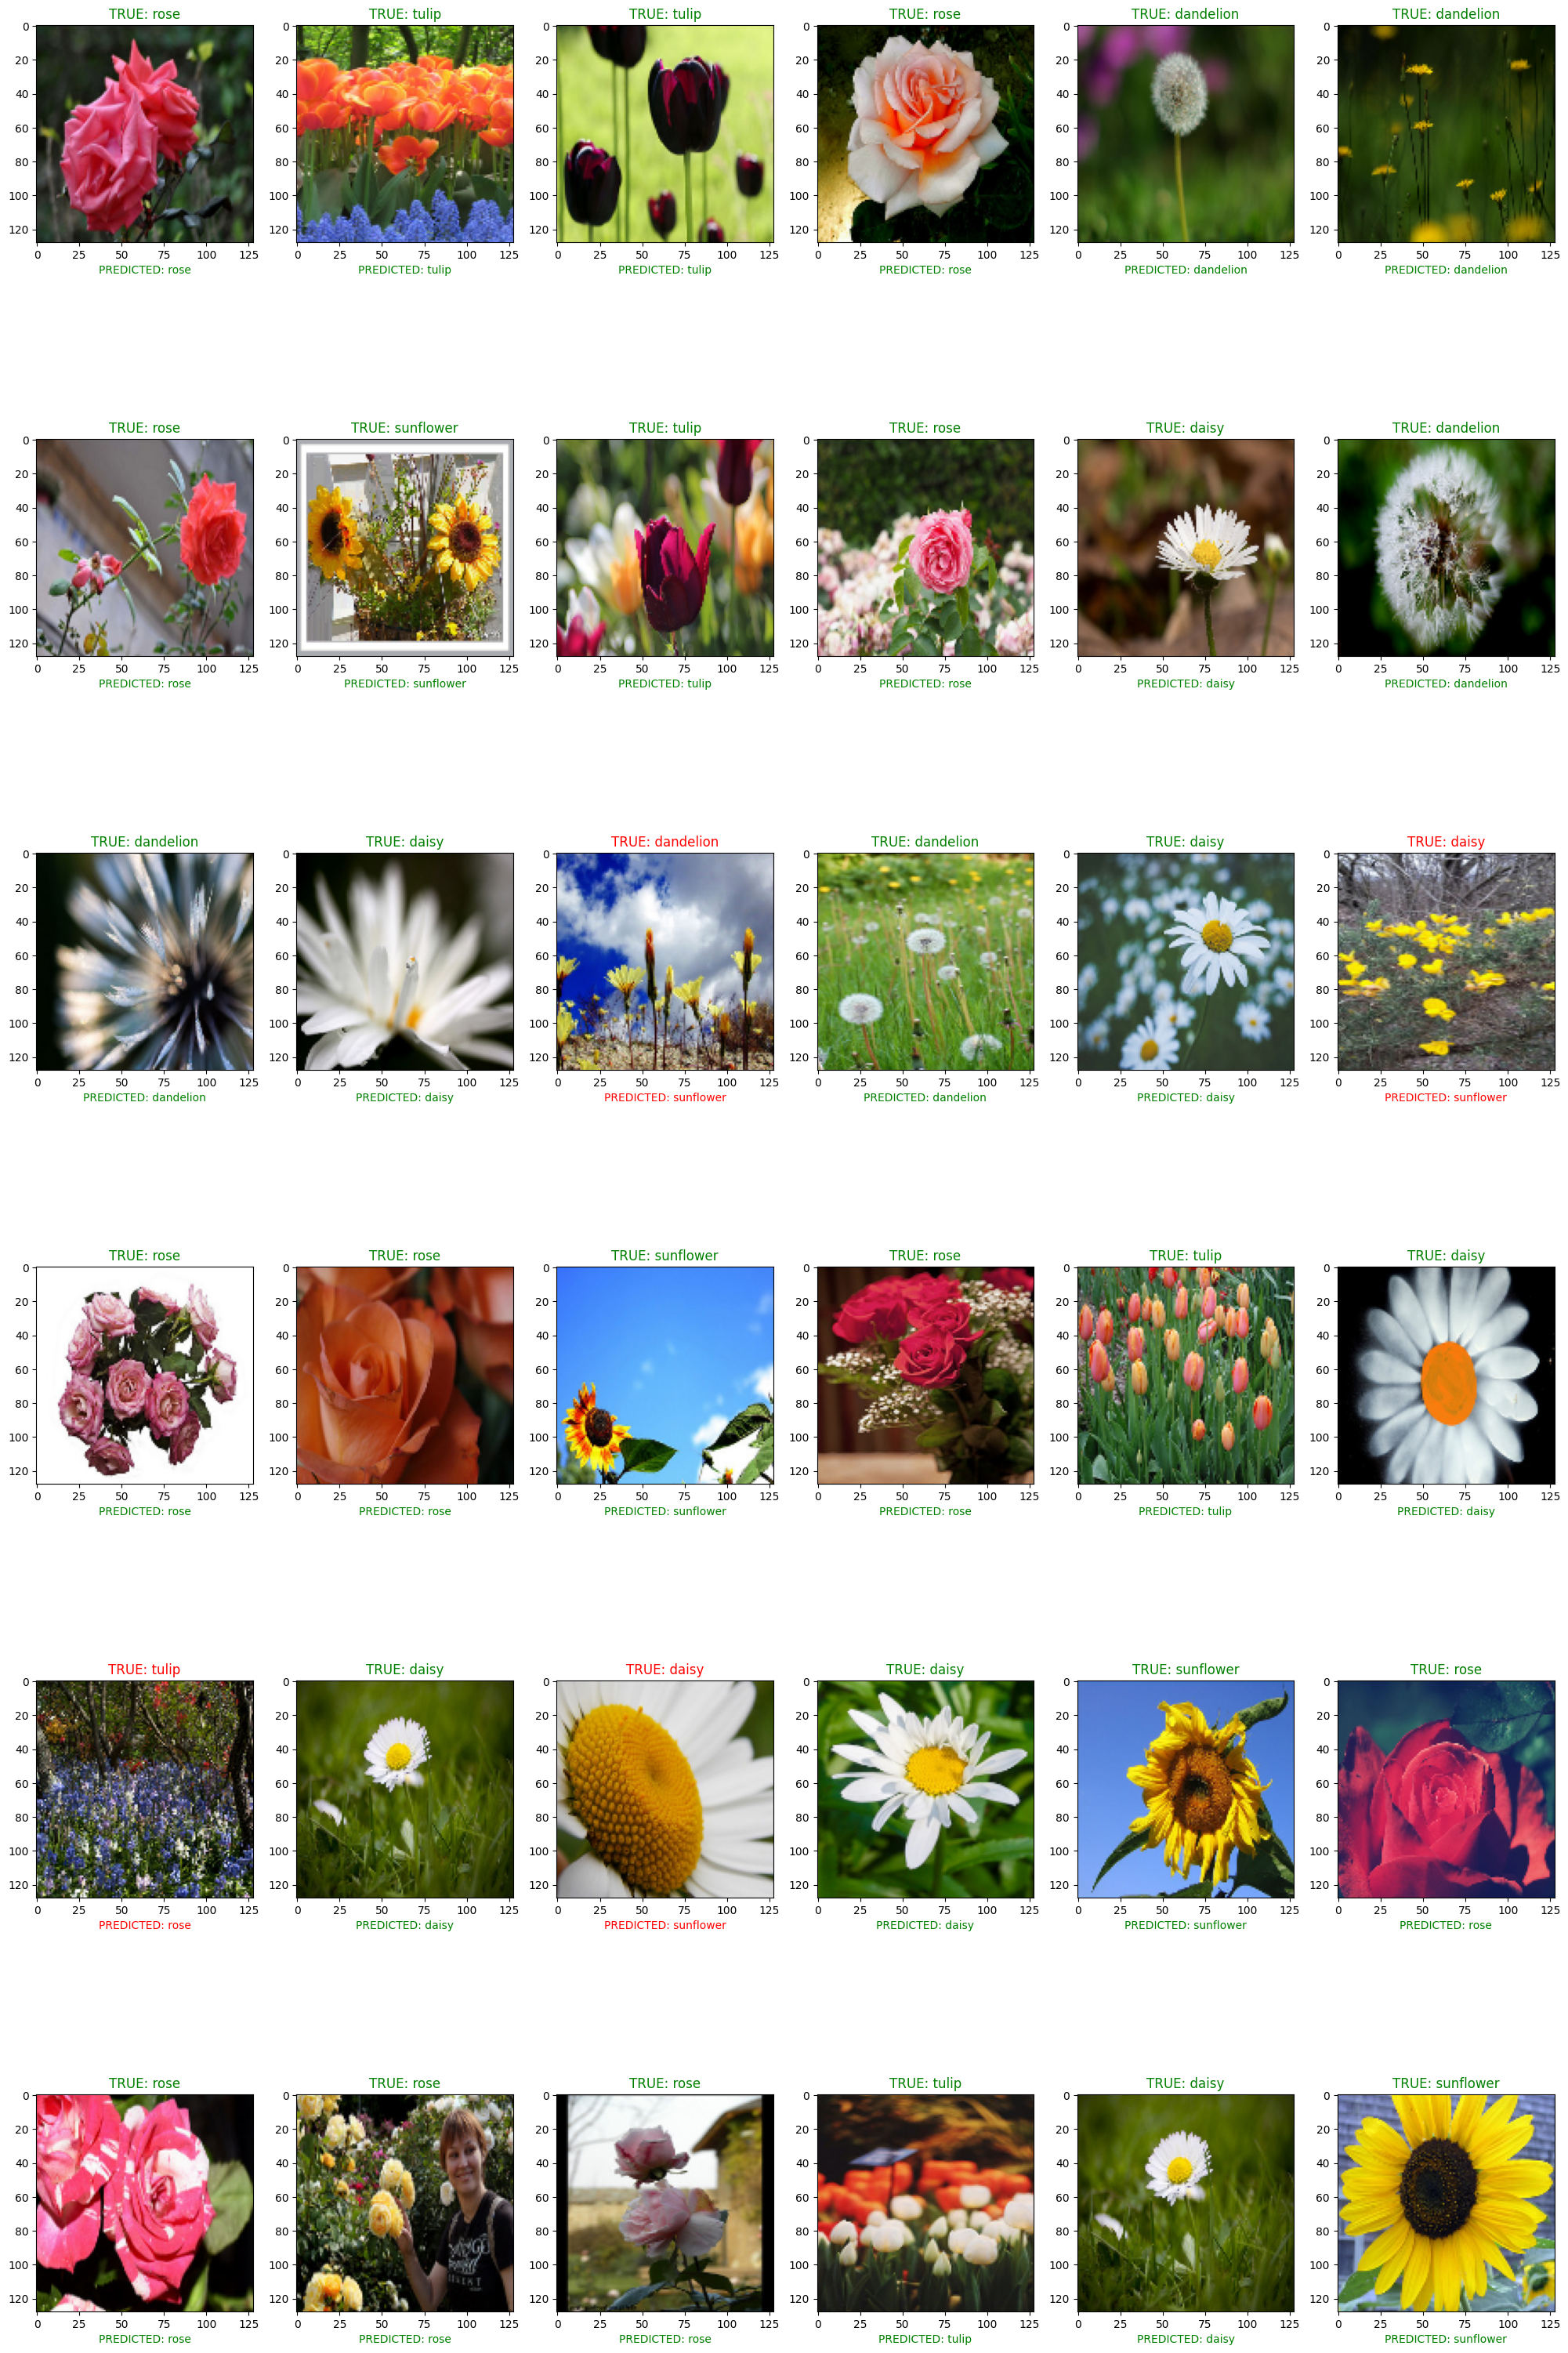

In [ ]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [ ]:


import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')


plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()



In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.6384181976318359
Test accuracy: 0.7719907164573669
